In [21]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import coordinates
from astropy import units as u
from astropy.io import fits
from skipper import observe

In [34]:
from matplotlib import patches

In [71]:
plt.rcParams['font.size'] = 20

### import pre-made tiliing file

In [42]:
hdul2 = fits.open('../data/decam-tiles-decals-merian.fits.gz')
data2 = hdul2[1].data
tileID2 = data2['TILEID']
pass_num2 = data2['PASS']
ra2 = data2['RA']
dec2 = data2['DEC']
circle_radius = (3.18/np.pi)**0.5

In [31]:
# \\ COSMOS region
center = coordinates.SkyCoord ("10h00m28.6s+02d12m21.0s")
size = (1.4, 1.4)

In [55]:
rac = (ra2>=(center.ra.deg-size[0]))&(ra2<=(center.ra.deg+size[0]))
decc = (dec2>=(center.dec.deg-size[1]))&(dec2<=(center.dec.deg+size[1]))
in_cosmos_rough = rac&decc

In [56]:
corners_ra = [center.ra.deg-size[0]/2, center.ra.deg+size[0]/2]
corners_dec = [center.dec.deg-size[1]/2, center.dec.deg+size[1]/2]
def in_cosmos ( ra, dec, radius ):
    # \\ center in COSMOS
    center_is_in = (ra>corners_ra[0])&(ra<corners_ra[1])&(dec>corners_dec[0])&(dec<corners_dec[1])
    if center_is_in:
        return True
    
    # \\ in radius from corners
    for ia in range(2):
        radist = (ra - corners_ra[ia])**2
        for ib in range(2):
            decdist = (dec - corners_dec[ib])**2
            
            totdist = np.sqrt ( radist + decdist )
            if totdist <= radius:
                return True
    # \\ in radius from sides
    for ia in range(2):
        if (dec > corners_dec[0])&(dec<corners_dec[1]):
            if (ra > (corners_ra[0]-radius)) & (ra < (corners_ra[1]+radius)):
                return True
            
    for ib in range(2):
        if (ra > corners_ra[0])&(ra<corners_ra[1]):
            if (dec > (corners_dec[0]-radius)) & (dec < (corners_dec[1]+radius)):
                return True
    
    return False
    

Text(0,0.5,'Dec (deg)')

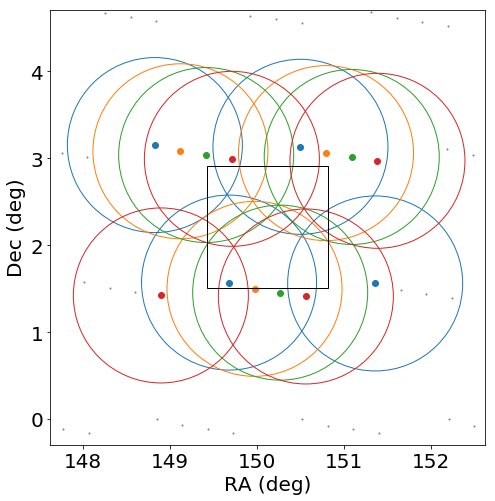

In [73]:
fig = plt.figure ( figsize=(8,8))
ax = plt.subplot(111, aspect='equal')
rect = patches.Rectangle ( [center.ra.deg - size[0]/2, center.dec.deg - size[1]/2],
                          width = size[0], 
                          height= size[1],
                         fc='None', ec='k')
ax.scatter ( ra2, dec2, color='grey', s=1)

ra_l = []
dec_l = []
for ra,dec,passn in zip(ra2[in_cosmos_rough], dec2[in_cosmos_rough], pass_num2[in_cosmos_rough]):
    if not in_cosmos(ra,dec,circle_radius):
        continue
    color = f'C{passn-1}'
    circ = patches.Circle ( [ra,dec], radius=circle_radius, fc='None', ec=color)
    ax.add_patch(circ)
    ax.scatter(ra,dec, color=color)
    ra_l.append(ra)
    dec_l.append(dec)
ax.add_patch (rect)
ax.set_xlim ( center.ra.deg - 2.5,  center.ra.deg  + 2.5)
ax.set_ylim ( center.dec.deg- 2.5,  center.dec.deg + 2.5)

ax.set_xlabel ( 'RA (deg)')
ax.set_ylabel ('Dec (deg)')

#### initialize ObservingCatalog; build JSON from first 100 entries

In [74]:
ocat = observe.ObsCatalog (comment='TEST')

In [77]:
df = ocat.build_catalog ( ra_l, dec_l, 'COSMOS', 'N708', 'science', 15.*60 )
ocat.to_json ( df )

In [78]:
df

,comment,filter,seqtot,seqnum,expType,object,proposer,program,RA,propid,dec,expTime
0,TEST,N708,14,1,science,COSMOS,Leauthaud,Merian,149.677000,2020B-XXXX,1.571000,900.0
1,TEST,N708,14,2,science,COSMOS,Leauthaud,Merian,148.824000,2020B-XXXX,3.152000,900.0
2,TEST,N708,14,3,science,COSMOS,Leauthaud,Merian,151.357000,2020B-XXXX,1.561000,900.0
3,TEST,N708,14,4,science,COSMOS,Leauthaud,Merian,150.498000,2020B-XXXX,3.132000,900.0
4,TEST,N708,14,5,science,COSMOS,Leauthaud,Merian,149.969817,2020B-XXXX,1.498882,900.0
5,TEST,N708,14,6,science,COSMOS,Leauthaud,Merian,149.118028,2020B-XXXX,3.080511,900.0
6,TEST,N708,14,7,science,COSMOS,Leauthaud,Merian,150.791898,2020B-XXXX,3.059292,900.0
7,TEST,N708,14,8,science,COSMOS,Leauthaud,Merian,150.264847,2020B-XXXX,1.455253,900.0
8,TEST,N708,14,9,science,COSMOS,Leauthaud,Merian,149.413767,2020B-XXXX,3.037249,900.0
9,TEST,N708,14,10,science,COSMOS,Leauthaud,Merian,151.087561,2020B-XXXX,3.015317,900.0
